In [4]:
#discover the size of data
df.shape

(110527, 14)

> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [noshowappointments-kagglev2-may-2016.csv]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
A person who makes a doctor appointment, receives all the instructions and no_show.
Who should be blamed? If this help you studying or working, Reference to Joni Hoppen and Aquarela Advanced Analytics Aquarela
110.527 medical appointments its 14 associated characteristics.
The most important one if the patient show-up or no-show to the appointment.
Variable names are self-explanatory, if you have doubts, just let me know!


### Question(s) for Analysis
Does the gender affects the attendance of the appointment ?
Does people more than 40 showed for the appointments more ?
Which disease their patient shows the most or affected on patient's to attend the appointment ?
Does SMS messages affected their attendance ?

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **import data, 
check data types**

In [3]:
#uplode data_set
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#show the information about the datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [6]:
#check for missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

It look like our data is good, no missing data is found

In [7]:
# check for duplicates 
df.duplicated().sum()

0

In [8]:
df['PatientId'].nunique()

62299

In [9]:
df['PatientId'].duplicated().sum()

48228

In [10]:
df.duplicated(['PatientId','No-show']).sum()

38710

In [11]:
df.describe()
##mask=df.query('Age=="-1"')
##mask

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


# There are no dplicates in our data, it's great!


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

1- Convert the data types of PatientId and AppointmentID to strings data types.
2- Clean ages with negative values to positive.
3- Change 'Hipertension' to 'Hypertension', it seems good thing.
4- Change 'No-show' to 'no_show', it seems good thing.

Change name of Hipertension and No-show

In [11]:
df.rename(columns={'Hipertension':'Hypertension'},inplace=True)
df.rename(columns={'No-show':'No_show'},inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Change the types of PatientId and AppointmentID

In [12]:
df['PatientId'] = df['PatientId'].astype(str)
df['AppointmentID'] = df['AppointmentID'].astype(str)

making sure they have been changed 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null object
AppointmentID     110527 non-null object
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
dtypes: int64(7), object(7)
memory usage: 11.8+ MB


In [14]:
df.drop_duplicates(['PatientId','No_show'],inplace=True)
df.shape

(71817, 14)

In [15]:
#making sure they have been changed 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71817 entries, 0 to 110524
Data columns (total 14 columns):
PatientId         71817 non-null object
AppointmentID     71817 non-null object
Gender            71817 non-null object
ScheduledDay      71817 non-null object
AppointmentDay    71817 non-null object
Age               71817 non-null int64
Neighbourhood     71817 non-null object
Scholarship       71817 non-null int64
Hypertension      71817 non-null int64
Diabetes          71817 non-null int64
Alcoholism        71817 non-null int64
Handcap           71817 non-null int64
SMS_received      71817 non-null int64
No_show           71817 non-null object
dtypes: int64(7), object(7)
memory usage: 8.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Replace this header name!)

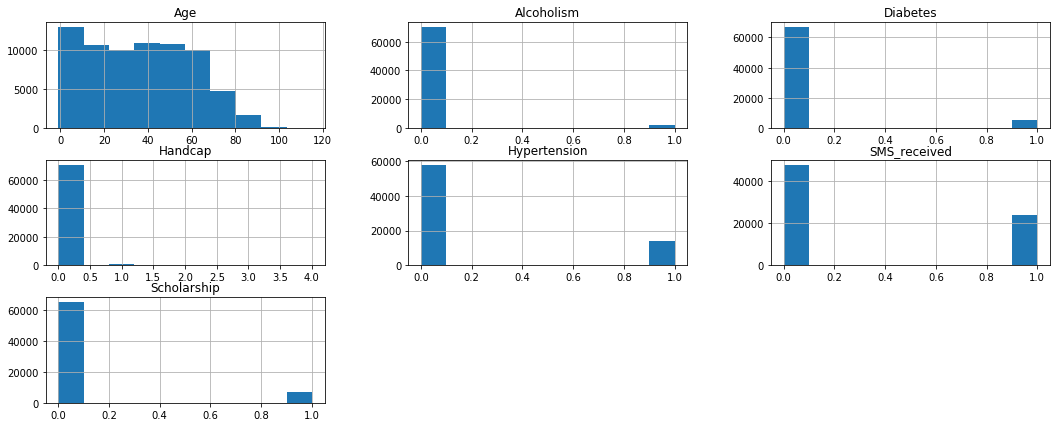

In [16]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize=(18,7));

In [17]:
#splitting data with gender and show for easier analysis
fe = df[df['Gender'] == 'F'].loc[:,{'Gender' , 'No_show'}]
ml = df[df['Gender'] == 'M'].loc[:,{'Gender' , 'No_show'}]

print(fe.head(2))
print(ml.head(2))

  Gender No_show
0      F      No
2      F      No
   Gender No_show
1       M      No
11      M     Yes


### Research Question 2:  Do people more than 40 showed for the appointments more?

In [18]:
fe['No_show'].value_counts()

No     34961
Yes    11506
Name: No_show, dtype: int64

In [19]:
#define a function to plot female and male graphs 
def plot_gen(g,y) :
    ax = sns.countplot(x="No_show", data=g)
    plt.xlabel("No_Show")
    plt.ylabel(f"Counts of {y} no show")
    plt.title(f'Gender counts of "no_show" for {y} ')

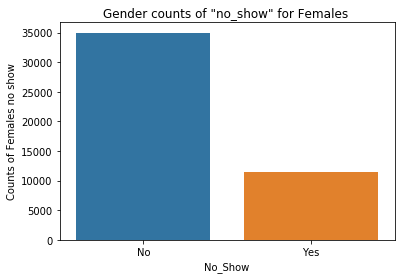

In [20]:
plot_gen(fe , 'Females')

In [21]:
show=df.No_show=='No'
no_show=df.No_show=='Yes'
df[show].count(),df[no_show].count

(PatientId         54154
 AppointmentID     54154
 Gender            54154
 ScheduledDay      54154
 AppointmentDay    54154
 Age               54154
 Neighbourhood     54154
 Scholarship       54154
 Hypertension      54154
 Diabetes          54154
 Alcoholism        54154
 Handcap           54154
 SMS_received      54154
 No_show           54154
 dtype: int64,
 <bound method DataFrame.count of                 PatientId AppointmentID Gender          ScheduledDay  \
 6       733688164476661.0       5630279      F  2016-04-27T15:05:12Z   
 7         3449833394123.0       5630575      F  2016-04-27T15:39:58Z   
 11        7542951368435.0       5620163      M  2016-04-26T08:44:12Z   
 17       14794966191172.0       5633460      F  2016-04-28T09:28:57Z   
 20      622257462899397.0       5626083      F  2016-04-27T07:51:14Z   
 ...                   ...           ...    ...                   ...   
 110470    4125932768366.0       5692391      F  2016-05-12T15:12:01Z   
 110479    4455243

In [22]:
greaterthan40 = df[df['Age'] >= 40]
greaterthan40.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,29872499824296.0,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.0,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [23]:
greaterthan40['No_show'].value_counts()

No     25445
Yes     7113
Name: No_show, dtype: int64

Text(0.5,1,'Investigationg Counts of No for people greater >  40 ')

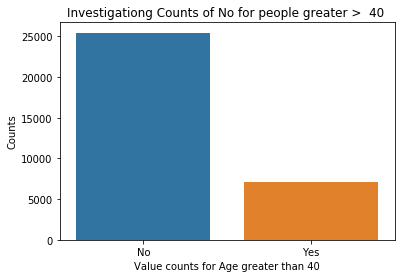

In [24]:
ax = sns.countplot(x="No_show", data=greaterthan40)
plt.xlabel('Value counts for Age greater than 40')
plt.ylabel('Counts')
plt.title('Investigationg Counts of No for people greater >  40 ')

It look like there are people greater than 40 years have high ablitiy to show up for their appointments.

# Research Question 3 :The most frequent neighboorhood patients show for their appointements in and the least one .

In [25]:
# the place which most of their appointments pattients showed up 
df['Neighbourhood'][df['No_show'] == 'Yes'].mode()

0    JARDIM CAMBURI
dtype: object

In [26]:
# the place which most of their appointments pattients didn't showed up 
df['Neighbourhood'][df['No_show'] == 'No'].mode()

0    JARDIM CAMBURI
dtype: object

Neighbourhood with the biggest no show patients is 'JARDIM CAMBURI'.

# Research Question 4: Which disease their patients show the most or affected on patient's to attend the appointment!?

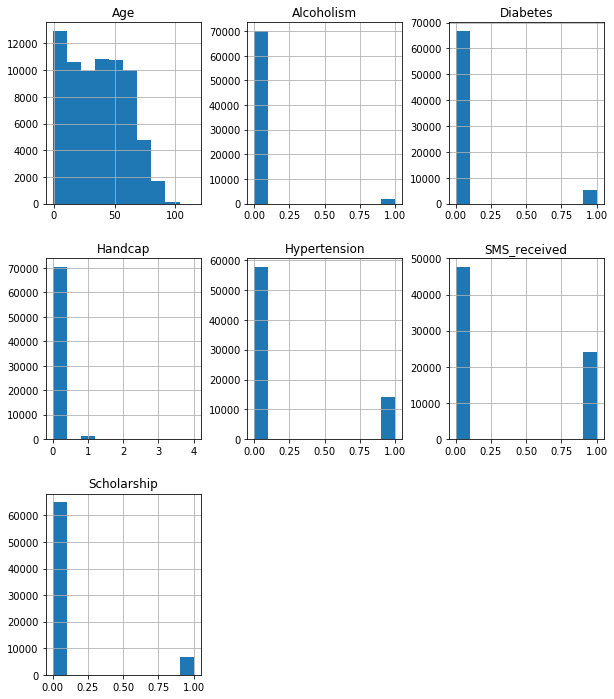

In [27]:
df.hist(figsize=(10,12));

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa6532e4748>,
      dtype=object)

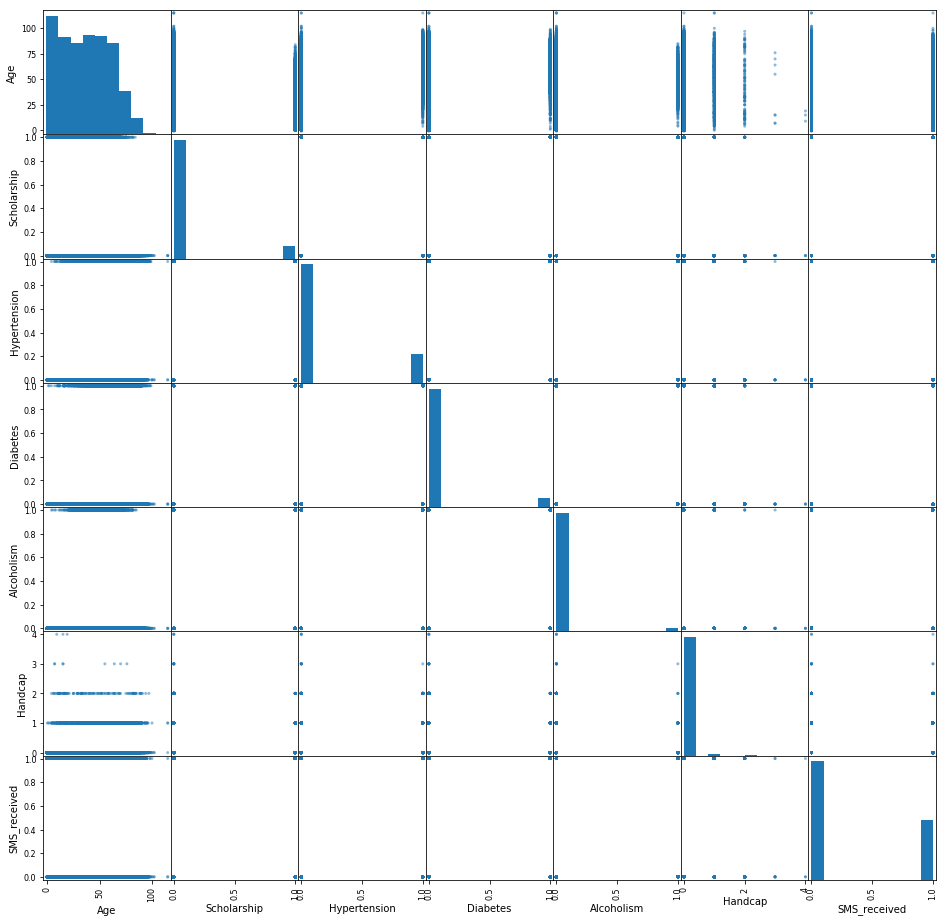

In [37]:
pd.plotting.scatter_matrix(df, figsize=(16,16))

From the graphs, It look like the patients who suffering from Hypertension and Diabetes attend their appointments more than those who do not have this condition.

# Research Question: 5 Do sms messages affected their attendance!?

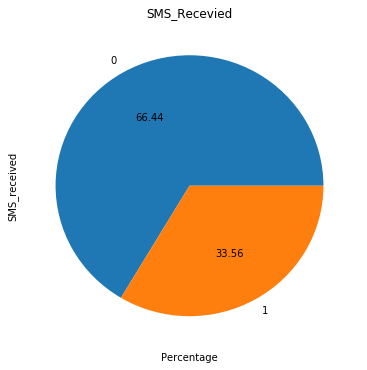

In [43]:
df['SMS_received'].value_counts().plot(figsize=(6,6),kind='pie',autopct='%.2f');
plt.xlabel('Percentage');
plt.title("SMS_Recevied");

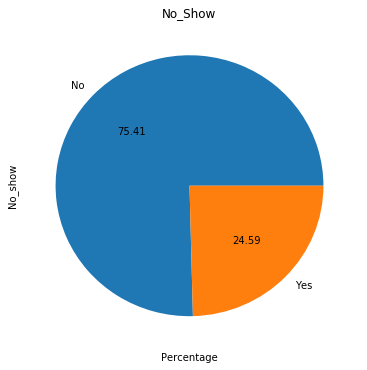

In [45]:
df['No_show'].value_counts().plot(figsize=(6,6),kind='pie',autopct='%.2f');
plt.xlabel('Percentage');
plt.title("No_Show");

There are 67.90 % didn't recieve SMS messeges and they showed up their appointments.

<a id='conclusions'></a>
## Conclusions

My Analysis indicated that patients who did not have any of the illnesses included in the dataset had greater no-show rates than those who did.
It looks little difference whatever ailment "hypertension, diabetes, alcoholism, or disability" the patient have.
I discovered significant variations in the proportions of no_shows between communities.
Finally, and maybe most unexpectedly, for the appointments in this dataset, an SMS inform patients of their forthcoming visit made things worse.

Limitations:

Most of the using data is categorical, so it can not show strong correlation!.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])